In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

# Traffic Information

### Highway Traffic Counts (2021)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Capstone-KPMG/3_Data_Exploration/2_Traffic&Routes
!ls
# traffic count
df_TrafficCount = pd.read_csv('WSDOT_-_Traffic_Counts_(AADT).csv')
df_TrafficCount['StateRouteNumber'] = df_TrafficCount['StateRouteNumber'].apply(str)
df_TrafficCount.head()

Mounted at /content/drive/
/content/drive/My Drive/Capstone-KPMG/3_Data_Exploration/2_Traffic&Routes
 WSDOT_-_Local_Agency_Public_Road_Lines.csv
 WSDOT_-_Local_Agency_Public_Road_Routes.csv
 WSDOT_-_National_Highway_System_for_Non-State_Routes.csv
 WSDOT_-_National_Highway_System_for_State_Routes.csv
 WSDOT_-_Roadway_Data_Divided_Highway.csv
'WSDOT_-_Traffic_Counts_(AADT).csv'


,X,Y,OBJECTID,LRSDate,RouteIdentifier,StateRouteNumber,RelatedRouteType,RelatedRouteQualifier,AccumulatedRouteMile,AADT,SingleUnitTruckPct,DoubleUnitTruckPct,TripleUnitTruckPct,DirectionOfTravel,Location,GlobalID,ReportingYear
0,-122.365641,48.240274,1,2021/12/31 00:00:00+00,532,532,NaN,NaN,4.26,19000,NaN,NaN,NaN,Bothways,After Milepost 4.25 A: RIGHT INTERSECTION 98TH...,{9B3865D4-8261-4196-A946-13A1955B8AF5},2021
1,-122.253938,47.298320,2,2021/12/31 00:00:00+00,167Q101469,167,Q1,01469,0.20,3700,NaN,NaN,NaN,Northbound,On Q1 RAMP (15TH ST SW TO SR 167 NB) After RIG...,{0D9D296A-1DFD-4439-9EEA-B3584A94167F},2021
2,-118.387595,46.027572,3,2021/12/31 00:00:00+00,125,125,NaN,NaN,1.89,16000,NaN,NaN,NaN,Bothways,After Milepost 1.88 A: LEFT INTERSECTION COLLE...,{5A643190-D5CC-4A33-8322-661CEBA58B7F},2021
3,-122.541535,46.937836,4,2021/12/31 00:00:00+00,702,702,NaN,NaN,0.59,8700,4.44,2.13,0.31,Bothways,After Milepost 0.58 A: RIGHT INTERSECTION HART...,{1F772D26-2ECC-4503-9A93-365F86B75653},2021
4,-122.333841,47.545449,5,2021/12/31 00:00:00+00,099S102690,99,S1,02690,0.13,15000,NaN,NaN,NaN,Southbound,On S1 RAMP (E MARGNL WAY TO SR 99 SB) After RI...,{0E0F487B-F425-4C64-BF26-5ECA88B40456},2021


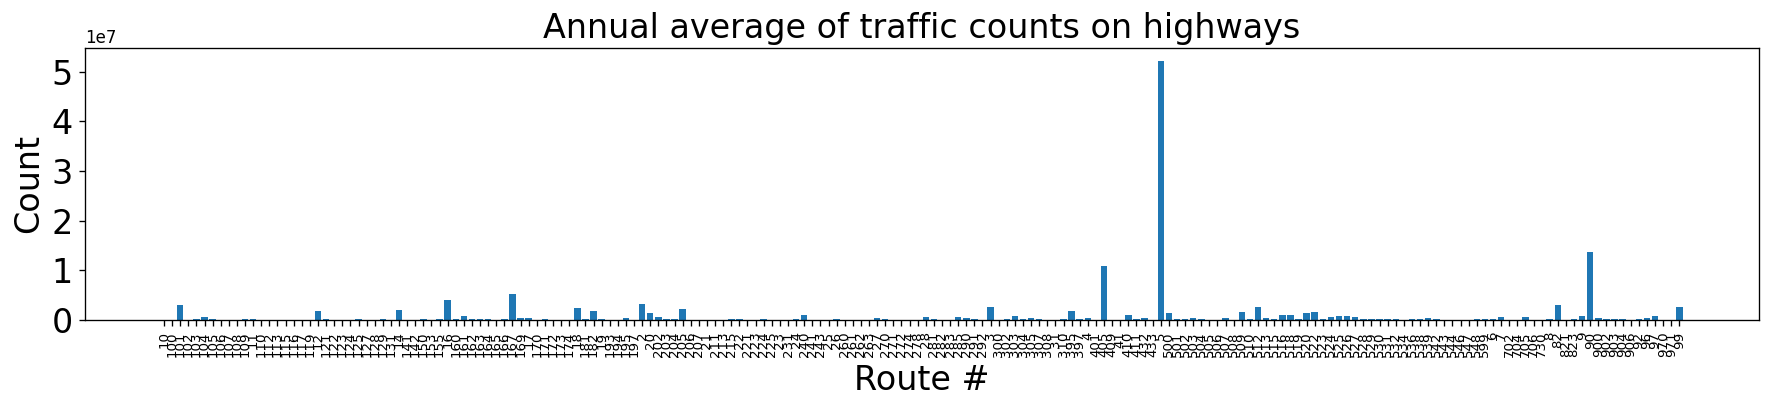

In [ ]:
df_route_cnt = df_TrafficCount.groupby('StateRouteNumber').sum()['AADT'].reset_index()
plt.figure(figsize=(18, 3), dpi=120)
plt.bar(df_route_cnt['StateRouteNumber'],df_route_cnt['AADT']) #RouteIdentifier
plt.title("Annual average of traffic counts on highways", fontsize = 20)
plt.xlabel("Route #", fontsize =  20)
plt.xticks(fontsize=8, rotation = 90)
plt.ylabel("Count", fontsize = 20)
plt.yticks(fontsize=20)
plt.show()

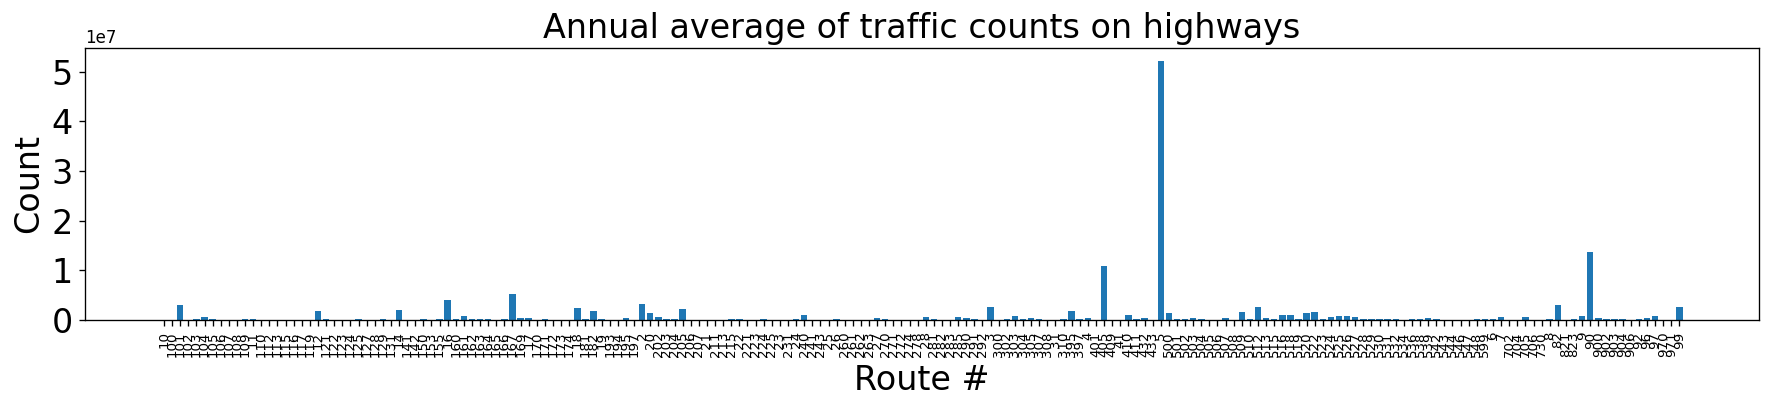

In [ ]:
df_route_cnt = df_TrafficCount.groupby('StateRouteNumber').sum()['AADT'].reset_index()
#df_route_avg = df_TrafficCount.groupby('StateRouteNumber').mean()['AADT'].reset_index()
plt.figure(figsize=(18, 3), dpi=120)
#plt.bar(df_route_avg['StateRouteNumber'],df_route_avg['AADT']) #RouteIdentifier, df_route_cnt
plt.bar(df_route_cnt['StateRouteNumber'],df_route_cnt['AADT']) #RouteIdentifier
plt.title("Annual average of traffic counts on highways", fontsize = 20)
plt.xlabel("Route #", fontsize =  20)
plt.xticks(fontsize=8, rotation = 90)
plt.ylabel("Count", fontsize = 20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
len(df_route_cnt)

188

In [ ]:
df_route_cnt[df_route_cnt['AADT']>0.25e7]
#df_route_avg[df_route_avg['AADT']>30000]

,StateRouteNumber,AADT
2,101,2947190
35,16,4059730
43,167,5147660
59,2,3211660
116,405,10818210
123,5,52188760
135,512,2643600
172,82,3070290
176,90,13711790
187,99,2529970


In [ ]:
df_route_cnt[df_route_cnt['AADT']>0.25e7].sum()

StateRouteNumber    1011616724055512829099
AADT                             100328860
dtype: object

In [ ]:
df_route_cnt[df_route_cnt['AADT']>0.25e7]['AADT']/df_TrafficCount.sum()['AADT']

<ipython-input-8-9d296c205ebf>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_route_cnt[df_route_cnt['AADT']>0.25e7]['AADT']/df_TrafficCount.sum()['AADT']


2      0.019691
35     0.027125
43     0.034394
59     0.021458
116    0.072281
123    0.348695
135    0.017663
172    0.020514
176    0.091614
187    0.016904
Name: AADT, dtype: float64

In [ ]:
df_TrafficCount[df_TrafficCount['StateRouteNumber'].isin(df_route_cnt[df_route_cnt['AADT']>0.25e7]['StateRouteNumber']) == False].sum()['AADT']/df_TrafficCount.sum()['AADT']

<ipython-input-9-cd60783883ee>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_TrafficCount[df_TrafficCount['StateRouteNumber'].isin(df_route_cnt[df_route_cnt['AADT']>0.25e7]['StateRouteNumber']) == False].sum()['AADT']/df_TrafficCount.sum()['AADT']


0.32966055122573057

In [ ]:
df_TrafficCount.sum()['AADT']

<ipython-input-10-9aef75f7e54c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_TrafficCount.sum()['AADT']


149668739

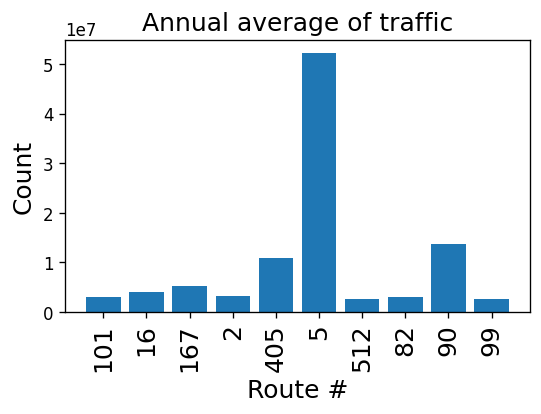

In [ ]:
plt.figure(figsize=(5,3), dpi=120)
plt.bar(df_route_cnt[df_route_cnt['AADT']>0.25e7]['StateRouteNumber'],df_route_cnt[df_route_cnt['AADT']>0.25e7]['AADT']) #RouteIdentifier
#plt.bar(df_route_avg[df_route_avg['AADT']>30000]['StateRouteNumber'],df_route_avg[df_route_avg['AADT']>30000]['AADT']) #RouteIdentifier
plt.title("Annual average of traffic", fontsize = 15)
plt.title("Annual average of traffic", fontsize = 15)
plt.xlabel("Route #", fontsize =  15)
plt.xticks(fontsize=15, rotation = 90)
plt.ylabel("Count", fontsize = 15)

plt.show()
plt.show()

In [ ]:
# % of large traffic areas
df_route_cnt[df_route_cnt['AADT']>0.25e7]['AADT'].sum()/df_TrafficCount['AADT'].sum()

0.6703394487742694

In [ ]:
df_large_traffic = df_TrafficCount[df_TrafficCount['StateRouteNumber'].isin(df_route_cnt[df_route_cnt['AADT']>0.25e7]['StateRouteNumber'])]
df_large_traffic.head()

,X,Y,OBJECTID,LRSDate,RouteIdentifier,StateRouteNumber,RelatedRouteType,RelatedRouteQualifier,AccumulatedRouteMile,AADT,SingleUnitTruckPct,DoubleUnitTruckPct,TripleUnitTruckPct,DirectionOfTravel,Location,GlobalID,ReportingYear
1,-122.253938,47.298320,2,2021/12/31 00:00:00+00,167Q101469,167,Q1,01469,0.200000,3700,NaN,NaN,NaN,Northbound,On Q1 RAMP (15TH ST SW TO SR 167 NB) After RIG...,{0D9D296A-1DFD-4439-9EEA-B3584A94167F},2021
4,-122.333841,47.545449,5,2021/12/31 00:00:00+00,099S102690,99,S1,02690,0.130000,15000,NaN,NaN,NaN,Southbound,On S1 RAMP (E MARGNL WAY TO SR 99 SB) After RI...,{0E0F487B-F425-4C64-BF26-5ECA88B40456},2021
5,-122.489745,48.782843,6,2021/12/31 00:00:00+00,005R125651,5,R1,25651,0.120000,2800,NaN,NaN,NaN,Southbound,On R1 RAMP (SR 5 SB TO FD25621) After LEFT INT...,{E88FB1DD-A9B1-4349-A0BE-0218F253D23B},2021
6,-122.262013,47.831624,7,2021/12/31 00:00:00+00,005,5,NaN,NaN,182.610001,130000,NaN,NaN,NaN,Bothways,At Milepost 182.63 A: BOTHWAYS UNDERCROSSING S...,{FD3067E2-1CE7-48CD-BC6C-417DF74E6816},2021
12,-122.468707,48.733232,13,2021/12/31 00:00:00+00,005R125232,5,R1,25232,0.170000,6900,NaN,NaN,NaN,Southbound,On R1 RAMP (SR 5 SB TO BYRON ST) After LEFT IN...,{F90C8FE5-D72E-4BC1-ADF6-2BBD6D9D9D73},2021


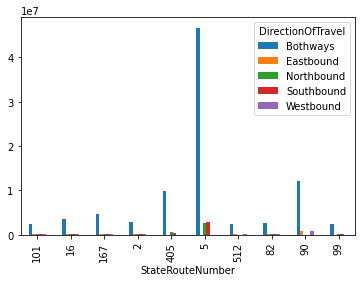

In [ ]:
df_large_traffic.groupby(['StateRouteNumber', 'DirectionOfTravel']).sum()['AADT'].reset_index().pivot("StateRouteNumber", "DirectionOfTravel", "AADT").plot(kind='bar')
plt.show()

In [ ]:
df_TrafficCount

,X,Y,OBJECTID,LRSDate,RouteIdentifier,StateRouteNumber,RelatedRouteType,RelatedRouteQualifier,AccumulatedRouteMile,AADT,SingleUnitTruckPct,DoubleUnitTruckPct,TripleUnitTruckPct,DirectionOfTravel,Location,GlobalID,ReportingYear
0,-122.365641,48.240274,1,2021/12/31 00:00:00+00,532,532,NaN,NaN,4.260000,19000,NaN,NaN,NaN,Bothways,After Milepost 4.25 A: RIGHT INTERSECTION 98TH...,{9B3865D4-8261-4196-A946-13A1955B8AF5},2021
1,-122.253938,47.298320,2,2021/12/31 00:00:00+00,167Q101469,167,Q1,01469,0.200000,3700,NaN,NaN,NaN,Northbound,On Q1 RAMP (15TH ST SW TO SR 167 NB) After RIG...,{0D9D296A-1DFD-4439-9EEA-B3584A94167F},2021
2,-118.387595,46.027572,3,2021/12/31 00:00:00+00,125,125,NaN,NaN,1.890000,16000,NaN,NaN,NaN,Bothways,After Milepost 1.88 A: LEFT INTERSECTION COLLE...,{5A643190-D5CC-4A33-8322-661CEBA58B7F},2021
3,-122.541535,46.937836,4,2021/12/31 00:00:00+00,702,702,NaN,NaN,0.590000,8700,4.44,2.13,0.31,Bothways,After Milepost 0.58 A: RIGHT INTERSECTION HART...,{1F772D26-2ECC-4503-9A93-365F86B75653},2021
4,-122.333841,47.545449,5,2021/12/31 00:00:00+00,099S102690,99,S1,02690,0.130000,15000,NaN,NaN,NaN,Southbound,On S1 RAMP (E MARGNL WAY TO SR 99 SB) After RI...,{0E0F487B-F425-4C64-BF26-5ECA88B40456},2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6877,-119.853410,47.219593,6878,2021/12/31 00:00:00+00,281,281,NaN,NaN,9.590000,7600,7.32,10.67,4.58,Bothways,After Milepost 9.58 A: BOTHWAYS INTERSECTION 9 NW,{CA75C697-D750-4D59-AC2D-77A5FF357AF7},2021
6878,-121.952785,46.505660,6879,2021/12/31 00:00:00+00,131,131,NaN,NaN,0.000000,260,12.29,1.66,0.00,Bothways,"At Milepost 0.00 A: BEGIN ROUTE, LEFT MISCELLA...",{B05B1165-DCA2-4C65-983F-B781ACC7C025},2021
6879,-120.506420,46.626591,6880,2021/12/31 00:00:00+00,082R103175,82,R1,03175,0.340000,10000,NaN,NaN,NaN,Westbound,On R1 RAMP (SR 82 WB TO SR 12 WB) After LEFT O...,{C73D31B1-6586-4768-B23D-45CC4EED973A},2021
6880,-123.002480,46.810142,6881,2021/12/31 00:00:00+00,005,5,NaN,NaN,88.980003,65000,NaN,NaN,NaN,Bothways,After Milepost 88.90 A: RIGHT ON RAMP OLD HWY 99,{DBD9CA87-8B9F-4898-BD04-DC63F9CE6D15},2021


In [ ]:
df_TrafficCount_sub1 = df_TrafficCount.query("X < -122.8 & Y <46.8")
df_TrafficCount_sub2 = df_TrafficCount.query("X > -120 & Y >47.75")
df_TrafficCount_sub3 = df_TrafficCount.query("X > -119.5 & Y >46.25 &  Y < 47.5")

In [ ]:
print("AADT:", df_TrafficCount_sub1['AADT'].sum())
df_TrafficCount_sub1['AADT'].sum()/df_TrafficCount['AADT'].sum()

AADT: 6243820


0.04171759608397583

In [ ]:
print("AADT:", df_TrafficCount_sub2['AADT'].sum())
df_TrafficCount_sub2['AADT'].sum()/df_TrafficCount['AADT'].sum()

AADT: 1716549


0.01146898818997867

In [ ]:
print("AADT:", df_TrafficCount_sub3['AADT'].sum())
df_TrafficCount_sub3['AADT'].sum()/df_TrafficCount['AADT'].sum()

AADT: 5069390


0.03387073368741351

In [ ]:
import branca.colormap as cm

center = 47.7511, -120.7401

# create a LinearColorMap and assign colors, vmin, and vmax
colormap = cm.LinearColormap(colors=['green', 'yellow', 'red'], vmin=df_TrafficCount['AADT'].min(), vmax=df_TrafficCount['AADT'].max())

# create our map again.  This time I am using a different tileset for a new look
m_traffic = folium.Map(location=center, 
               zoom_start=7,
               width=800,height=600)

# Same as before... go through each home in set, make circle, and add to map.
# This time we add a color using price and the colormap object
for i in range(len(df_large_traffic)):
    folium.Circle(
        location=[df_large_traffic.iloc[i]['Y'], df_large_traffic.iloc[i]['X']],
        radius=10,
        fill=True,
        color=colormap(df_large_traffic.iloc[i]['AADT']),
        fill_opacity=0.2
    ).add_to(m_traffic)

# the following line adds the scale directly to our map
m_traffic.add_child(colormap)

m_traffic

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import branca.colormap as cm

center = 47.7511, -120.7401

# create a LinearColorMap and assign colors, vmin, and vmax
colormap = cm.LinearColormap(colors=['green', 'yellow', 'red'], vmin=df_TrafficCount['AADT'].min(), vmax=df_TrafficCount['AADT'].max())

# create our map again.  This time I am using a different tileset for a new look
m_total_traffic = folium.Map(location=center, 
               zoom_start=7,
               width=800,height=600)

# Same as before... go through each home in set, make circle, and add to map.
# This time we add a color using price and the colormap object
for i in range(len(df_TrafficCount)):
    folium.Circle(
        location=[df_TrafficCount.iloc[i]['Y'], df_TrafficCount.iloc[i]['X']],
        radius=10,
        fill=True,
        color=colormap(df_TrafficCount.iloc[i]['AADT']),
        fill_opacity=0.2
    ).add_to(m_total_traffic)

# the following line adds the scale directly to our map
m_total_traffic.add_child(colormap)
m_total_traffic

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_small_traffic = df_TrafficCount[df_TrafficCount['StateRouteNumber'].isin(df_route_cnt[df_route_cnt['AADT']>0.5e7]['StateRouteNumber'])==False]
df_small_traffic.head()

,X,Y,OBJECTID,LRSDate,RouteIdentifier,StateRouteNumber,RelatedRouteType,RelatedRouteQualifier,AccumulatedRouteMile,AADT,SingleUnitTruckPct,DoubleUnitTruckPct,TripleUnitTruckPct,DirectionOfTravel,Location,GlobalID,ReportingYear
0,-122.365641,48.240274,1,2021/12/31 00:00:00+00,532,532,NaN,NaN,4.26,19000,NaN,NaN,NaN,Bothways,After Milepost 4.25 A: RIGHT INTERSECTION 98TH...,{9B3865D4-8261-4196-A946-13A1955B8AF5},2021
2,-118.387595,46.027572,3,2021/12/31 00:00:00+00,125,125,NaN,NaN,1.89,16000,NaN,NaN,NaN,Bothways,After Milepost 1.88 A: LEFT INTERSECTION COLLE...,{5A643190-D5CC-4A33-8322-661CEBA58B7F},2021
3,-122.541535,46.937836,4,2021/12/31 00:00:00+00,702,702,NaN,NaN,0.59,8700,4.44,2.13,0.31,Bothways,After Milepost 0.58 A: RIGHT INTERSECTION HART...,{1F772D26-2ECC-4503-9A93-365F86B75653},2021
4,-122.333841,47.545449,5,2021/12/31 00:00:00+00,099S102690,99,S1,02690,0.13,15000,NaN,NaN,NaN,Southbound,On S1 RAMP (E MARGNL WAY TO SR 99 SB) After RI...,{0E0F487B-F425-4C64-BF26-5ECA88B40456},2021
7,-122.056125,47.388786,8,2021/12/31 00:00:00+00,018,18,NaN,NaN,15.67,38000,NaN,NaN,NaN,Bothways,Before Milepost 15.15 A: LEFT ON RAMP SE 231ST ST,{5E794078-E441-4EFA-A591-2A82F2E3CA64},2021


In [ ]:
import branca.colormap as cm

center = 47.7511, -120.7401

# create a LinearColorMap and assign colors, vmin, and vmax
colormap = cm.LinearColormap(colors=['green', 'yellow', 'red'], vmin=df_small_traffic['AADT'].min(), vmax=df_small_traffic['AADT'].max()) #df_TrafficCount

# create our map again.  This time I am using a different tileset for a new look
m_small_traffic = folium.Map(location=center, 
               zoom_start=7,
               width=800,height=600)

# Same as before... go through each home in set, make circle, and add to map.
# This time we add a color using price and the colormap object
for i in range(len(df_small_traffic)):
    folium.Circle(
        location=[df_small_traffic.iloc[i]['Y'], df_small_traffic.iloc[i]['X']],
        radius=100,
        fill=True,
        color=colormap(df_small_traffic.iloc[i]['AADT']),
        fill_opacity=0.2
    ).add_to(m_small_traffic)

# the following line adds the scale directly to our map
m_small_traffic.add_child(colormap)
m_small_traffic

Output hidden; open in https://colab.research.google.com to view.

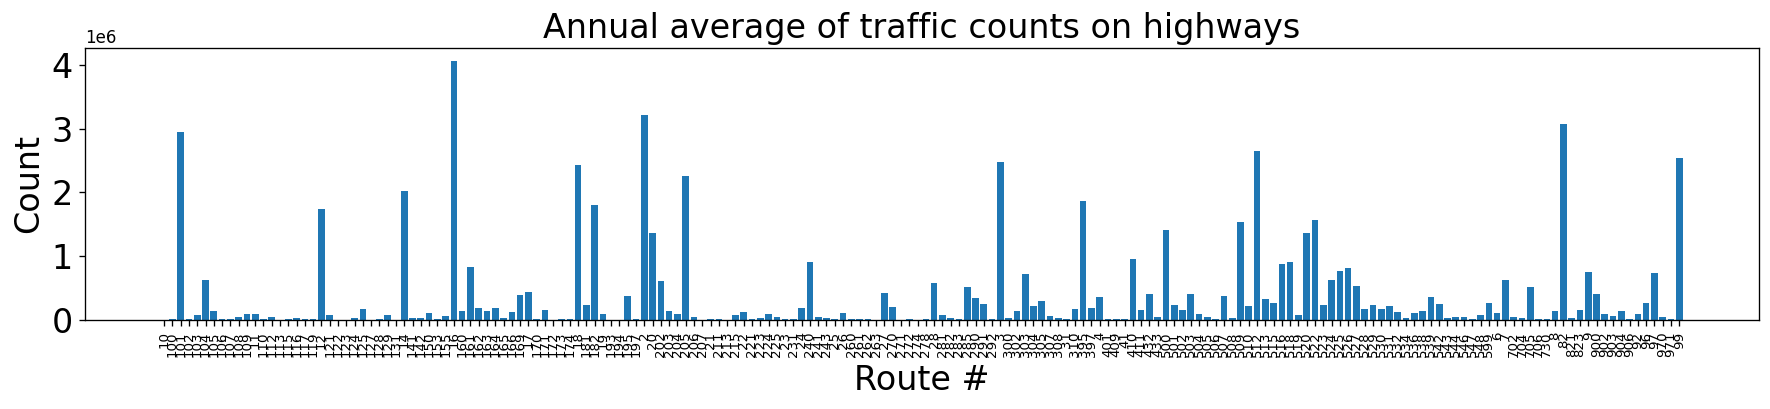

In [ ]:
df_route_cnt_small = df_small_traffic.groupby('StateRouteNumber').sum()['AADT'].reset_index()#.plot(kind='bar')
plt.figure(figsize=(18, 3), dpi=120)
plt.bar(df_route_cnt_small['StateRouteNumber'], df_route_cnt_small['AADT'])
plt.title("Annual average of traffic counts on highways", fontsize = 20)
plt.xlabel("Route #", fontsize =  20)
plt.xticks(fontsize=8, rotation = 90)
plt.ylabel("Count", fontsize = 20)
plt.yticks(fontsize=20)
plt.show()

# EV Charging Stations (2021)

1. EV Charging Station locations

In [ ]:
%cd /content/drive/My Drive/Capstone-KPMG/3_Data_Exploration/3_EVChargingStationLocations
!ls

df_EVstations = pd.read_csv("alt_fuel_stations(Sep_25_2022).csv")
#df_EVstations.head()

/content/drive/My Drive/Capstone-KPMG/3_Data_Exploration/3_EVChargingStationLocations
'alt_fuel_stations(Sep_25_2022).csv'


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20,31,39,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# select WA data
df_EVstations_WA = df_EVstations[df_EVstations['State'] == 'WA']
df_EVstations_WA.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
74,ELEC,City of Lacey - City Hall Parking,420 College St,"At 3rd Ave SE, next to police station",Lacey,WA,98503,NaN,360-491-3214,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
94,ELEC,Avista Corp,1411 E Mission Ave,NaN,Spokane,WA,99252,NaN,509-489-0500,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
95,ELEC,Steam Plant Grill,159 S Lincoln St,NaN,Spokane,WA,99201,NaN,509-777-3900,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
121,ELEC,BELLEVUE BELLEVUE CH 1,450 110th Ave NE,NaN,Bellevue,WA,98004,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,ELEC,The Evergreen State College,2700 Evergreen Pkwy NW,Parking Lot C,Olympia,WA,98505,NaN,360-867-6352,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [ ]:
m_large_traffic = folium.Map(location=center, 
               zoom_start=7,
               width=800,height=600)

# Same as before... go through each home in set, make circle, and add to map.
# This time we add a color using price and the colormap object
for i in range(len(df_TrafficCount)):
    folium.Circle(
        location=[df_TrafficCount.iloc[i]['Y'], df_TrafficCount.iloc[i]['X']],
        radius=10,
        fill=True,
        color=colormap(df_TrafficCount.iloc[i]['AADT']),
        fill_opacity=0.2
    ).add_to(m_large_traffic)

# the following line adds the scale directly to our map
m_large_traffic.add_child(colormap)

#m.save('price_colormap.html')
for i in range(len(df_EVstations_WA)):
  folium.Circle(
        location=[df_EVstations_WA.iloc[i]['Latitude'], df_EVstations_WA.iloc[i]['Longitude']],
        radius=100, 
        fill=True,
        fill_opacity=0.02,
        color = 'darkblue',
        popup = "Level 2: "+str(df_EVstations_WA.iloc[i]['EV Level2 EVSE Num'])
    ).add_to(m_large_traffic)

m_large_traffic


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_EVstations_WA_sub = df_EVstations_WA['Latitude']<47

## Filter L2

In [ ]:
df_EVstations_WA_l2 = df_EVstations_WA[df_EVstations_WA['EV Level2 EVSE Num'].isna()==False]

In [ ]:
m_l2 = folium.Map(location=center, 
               zoom_start=7,
               width=800,height=600)

# Same as before... go through each home in set, make circle, and add to map.
# This time we add a color using price and the colormap object
for i in range(len(df_TrafficCount)):
    folium.Circle(
        location=[df_TrafficCount.iloc[i]['Y'], df_TrafficCount.iloc[i]['X']],
        radius=10,
        fill=True,
        color=colormap(df_TrafficCount.iloc[i]['AADT']),
        fill_opacity=0.2
    ).add_to(m_l2)

# the following line adds the scale directly to our map
m_large_traffic.add_child(colormap)

#m.save('price_colormap.html')
for i in range(len(df_EVstations_WA)):
  folium.Circle(
        location=[df_EVstations_WA.iloc[i]['Latitude'], df_EVstations_WA.iloc[i]['Longitude']],
        radius=100, 
        fill=True,
        fill_opacity=0.02,
        color = 'darkblue',
        popup = "Level 2: "+str(df_EVstations_WA.iloc[i]['EV Level2 EVSE Num'])
    ).add_to(m_l2)

m_l2

# Save map 
#%cd /content/drive/My Drive/Capstone-KPMG/Data_Exploration/Graphs

#m_l2.save('m_traffic_with_station.html')


Output hidden; open in https://colab.research.google.com to view.

## Deep dive one area

In [ ]:
df_EVstations_WA_sub1 = df_EVstations_WA_l2.query("Longitude < -122.8 & Latitude <46.8")
df_EVstations_WA_sub2 = df_EVstations_WA_l2.query("Longitude > -120 & Latitude >47.75")
df_EVstations_WA_sub3 = df_EVstations_WA_l2.query("Longitude > -119.5 & Latitude >46.25 &  Latitude < 47.5")

In [ ]:
m = folium.Map(location=center, 
               zoom_start=7,
               width=800,height=600)

# Same as before... go through each home in set, make circle, and add to map.
# This time we add a color using price and the colormap object
for i in range(len(df_TrafficCount)):
    folium.Circle(
        location=[df_TrafficCount.iloc[i]['Y'], df_TrafficCount.iloc[i]['X']],
        radius=10,
        fill=True,
        color=colormap(df_TrafficCount.iloc[i]['AADT']),
        fill_opacity=0.2
    ).add_to(m)

# the following line adds the scale directly to our map
m_large_traffic.add_child(colormap)

#m.save('price_colormap.html')
for i in range(len(df_EVstations_WA_sub3)):
  folium.Circle(
        location=[df_EVstations_WA_sub3.iloc[i]['Latitude'], df_EVstations_WA_sub3.iloc[i]['Longitude']],
        radius=50*1.6*1000, 
        fill=True,
        fill_opacity=0.02,
        color = 'darkblue',
        popup = "Level 2: "+str(df_EVstations_WA_sub3.iloc[i]['EV Level2 EVSE Num'])
    ).add_to(m)
for i in range(len(df_EVstations_WA_sub3)):
  folium.Circle(
        location=[df_EVstations_WA_sub3.iloc[i]['Latitude'], df_EVstations_WA_sub3.iloc[i]['Longitude']],
        radius=100, 
        fill=True,
        fill_opacity=0.02,
        color = 'darkblue',
        popup = "Level 2: "+str(df_EVstations_WA_sub3.iloc[i]['EV Level2 EVSE Num'])
    ).add_to(m)

m


Output hidden; open in https://colab.research.google.com to view.

# Tourists

In [ ]:
%cd /content/drive/My Drive/Capstone-KPMG/3_Data_Exploration/5_Attraction
!ls

df_attractions = pd.concat([pd.read_csv("attraction_point.csv"), pd.read_csv("entertainment_point.csv")])
df_attractions

/content/drive/My Drive/Capstone-KPMG/3_Data_Exploration/5_Attraction
ACSDT1Y2021.B08131_Data.csv  commute.ipynb	      us_counties.json
attraction_point.csv	     entertainment_point.csv
commute.csv		     population.csv


,X,Y,tourism,name,shop,man_made,sport,addr:street,website,addr:housenumber,...,artwork_type,date,location,media,project,sac_id,screen,toilets:wheelchair,addr:unit,theatre:type
0,-119.185420,46.179051,attraction,9/11 WTC Memorial Kennewick,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-122.115748,48.008943,attraction,Abby Lola Bertain Memorial Wishing Well,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-121.675582,47.439649,attraction,Actual Cave,NaN,NaN,climbing,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-122.123359,47.730822,attraction,Adams Bench Winery,wine,winery,NaN,160th Place Northeast,NaN,14360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-123.500430,48.102737,attraction,Adventures Through Kayaking,NaN,NaN,NaN,Olympic Highway,https://www.atkayaking.com,2358.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,-122.670288,45.861515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
525,-122.218412,46.274931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526,-124.375700,47.612062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527,-123.798124,48.059631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_attractions.columns

Index(['X', 'Y', 'tourism', 'name', 'shop', 'man_made', 'sport', 'addr:street',
       'website', 'addr:housenumber', 'addr:postcode', 'addr:city', 'historic',
       'wikidata', 'phone', 'opening_hours', 'waterway', 'addr:state',
       'wikipedia', 'name:en', 'description', 'height', 'alt_name', 'natural',
       'wheelchair', 'amenity', 'ele', 'email', 'level', 'operator',
       'ship:type', 'studio', 'artist_name', 'artwork_type', 'date',
       'location', 'media', 'project', 'sac_id', 'screen',
       'toilets:wheelchair', 'addr:unit', 'theatre:type'],
      dtype='object')

In [ ]:
df_attractions['amenity'].unique()

array([nan, 'vending_machine', 'parking', 'bicycle_parking',
       'arts_centre', 'casino', 'cinema', 'community_centre', 'fountain',
       'nightclub', 'social_centre', 'stripclub', 'studio', 'theatre'],
      dtype=object)

In [ ]:
m_attractions = folium.Map(location=center, 
               zoom_start=7,
               width=800,height=600)

# Same as before... go through each home in set, make circle, and add to map.
# This time we add a color using price and the colormap object
for i in range(len(df_attractions)):
    folium.Circle(
        location=[df_attractions.iloc[i]['Y'], df_attractions.iloc[i]['X']],
        radius=1000,
        fill=True,
        color = 'orange',
        fill_opacity=0.2
    ).add_to(m_attractions)

#m.save('price_colormap.html')
for i in range(len(df_EVstations_WA)):
  folium.Circle(
        location=[df_EVstations_WA.iloc[i]['Latitude'], df_EVstations_WA.iloc[i]['Longitude']],
        radius=100, 
        fill=True,
        fill_opacity=0.02,
        color = 'darkblue',
        popup = "Level 2: "+str(df_EVstations_WA.iloc[i]['EV Level2 EVSE Num'])
    ).add_to(m_attractions)

  
m_attractions

Output hidden; open in https://colab.research.google.com to view.

# Crime Rate (2019)

In [ ]:
! pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0


In [ ]:
%cd /content/drive/My Drive/Capstone-KPMG/3_Data_Exploration/11_Crime
!ls

df_crime = pd.read_excel("washington.xls", header = 4, nrows = 150)
df_crime['Total Crime'] = df_crime.drop('Population', axis=1).sum(axis=1)
df_crime['crime%']= df_crime['Total Crime']/df_crime['Population']
df_crime.head()

/content/drive/My Drive/Capstone-KPMG/3_Data_Exploration/11_Crime
gas_station_with_county.csv  washington.xls


<ipython-input-46-2097b083619e>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_crime['Total Crime'] = df_crime.drop('Population', axis=1).sum(axis=1)


,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape1,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson,Total Crime,crime%
0,Aberdeen,16627,71,1,25,14,31,680,123,519,38,6,1508,0.090696
1,Airway Heights,9545,27,0,8,5,14,408,58,304,46,2,872,0.091357
2,Algona,3247,6,0,2,2,2,52,8,39,5,1,117,0.036033
3,Anacortes,17483,20,1,2,6,11,387,67,306,14,0,814,0.046560
4,Arlington,20043,47,1,7,5,34,703,93,570,40,3,1503,0.074989


In [ ]:
import json

In [ ]:
# # Initialize Folium Map again (same as before)

# %cd /content/drive/My Drive/Capstone-KPMG/3_Data_Exploration/14_Geojson
# !ls

# boundary_file_city = "wa_city_shape.json"
# with open(boundary_file_city, 'r') as f:
#     cities_boundary = json.load(f)


# # Filter python objects with list comprehensions
# output_dict = [x for x in cities_boundary["features"]]
# cities_boundary["features"] = output_dict

# # Create choropleth map  

# city = folium.Map(location=center, 
#                zoom_start=7,
#                width=800,height=600)

# # load my geojson file which contains my Polygons

# for i in range(len(df_EVstations_WA)):
#   folium.Circle(
#         location=[df_EVstations_WA.iloc[i]['Latitude'], df_EVstations_WA.iloc[i]['Longitude']],
#         radius=1, 
#         fill=True,
#         fill_opacity=0.02,
#         popup = "Level 2: "+str(df_EVstations_WA.iloc[i]['EV Level2 EVSE Num'])
#     ).add_to(city)

# folium.Choropleth(
#     geo_data=cities_boundary,
#     name='choropleth',
#     data=df_crime,
#     columns=['City', 'crime%'],
#     key_on='feature.properties.NAME',
#     fill_color='YlOrRd',
#     fill_opacity=0.6,
#     nan_fill_opacity=0,
#     line_opacity=1,
#     legend_name='crime rate'
# ).add_to(city)


# city

# CAN'T USE CITY LEVEL SO TRANSFER CITY INTO COUNTIES

In [ ]:
%cd /content/drive/My Drive/Capstone-KPMG/3_Data_Exploration/13_WA_Data
city_county = pd.read_excel("WA_city_county(wiki).xlsx",header = 1)[['Name', 'County']]
df_crime

df_crime_new = pd.merge(df_crime, city_county, how="left", left_on="City", right_on="Name")
df_crime_new.head()

/content/drive/My Drive/Capstone-KPMG/3_Data_Exploration/13_WA_Data


,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape1,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson,Total Crime,crime%,Name,County
0,Aberdeen,16627,71,1,25,14,31,680,123,519,38,6,1508,0.090696,Aberdeen,Grays Harbor
1,Airway Heights,9545,27,0,8,5,14,408,58,304,46,2,872,0.091357,Airway Heights,Spokane
2,Algona,3247,6,0,2,2,2,52,8,39,5,1,117,0.036033,Algona,King
3,Anacortes,17483,20,1,2,6,11,387,67,306,14,0,814,0.046560,Anacortes,Skagit
4,Arlington,20043,47,1,7,5,34,703,93,570,40,3,1503,0.074989,Arlington,Snohomish


In [ ]:
df_crime_new[df_crime_new['County'].isna()]['City']

Series([], Name: City, dtype: object)

In [ ]:
df_crime_new = df_crime_new.groupby('County').sum()[['Population','Total Crime']].reset_index()
df_crime_new['crime%'] = df_crime_new['Total Crime']/df_crime_new['Population'] 
df_crime_new.head()

,County,Population,Total Crime,crime%
0,Adams,10033,421,0.041962
1,Benton,164317,8602,0.052350
2,Chelan,34513,1401,0.040593
3,Clallam,31709,2493,0.078621
4,Clark,259381,15975,0.061589


In [ ]:
%cd /content/drive/My Drive/Capstone-KPMG/3_Data_Exploration/13_WA_Data

import json
import numpy as np

# load my geojson file which contains my Polygons
boundary_file = "us_counties.json"
with open(boundary_file, 'r') as f:
    counties_boundary = json.load(f)


# Filter python objects with list comprehensions
output_dict = [x for x in counties_boundary["features"] if x['properties']["STATE"] == '53']
counties_boundary["features"] = output_dict

/content/drive/My Drive/Capstone-KPMG/3_Data_Exploration/13_WA_Data


In [ ]:
m = folium.Map(location=center, 
               zoom_start=7,
               width=800,height=600)

# Same as before... go through each home in set, make circle, and add to map.
# This time we add a color using price and the colormap object

folium.Choropleth(
    geo_data=counties_boundary,
    name='choropleth',
    data=df_crime_new,
    columns=['County', 'crime%'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd',
    fill_opacity=0.6,
    nan_fill_opacity=0,
    line_opacity=1,
    legend_name='crime rate'
).add_to(m)

for i in range(len(df_EVstations_WA)):
  folium.Circle(
        location=[df_EVstations_WA.iloc[i]['Latitude'], df_EVstations_WA.iloc[i]['Longitude']],
        radius=100, 
        fill=True,
        fill_opacity=0.02,
        popup = "Level 2: "+str(df_EVstations_WA.iloc[i]['EV Level2 EVSE Num'])
    ).add_to(m)


m